In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import datetime

plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams.update({'font.size': 22})

In [2]:
forms = [0,1,2,3,4,5]
DATA = pd.DataFrame({'A' : []})

for i in forms:
    filename = 'May22/field_data_'+str(i)+'.txt'
    timename = 'time'+str(i)
    vcname = 'Vcath'+str(i)
    vaname = 'Vanode'+str(i)
    sumname = 'Vsum'+str(i)
    column_names = [timename, vcname, vaname]
    dataA = pd.read_csv(filename, sep="\t", skiprows=1, names=column_names)
    frames = [DATA,dataA]
    DATA=pd.concat(frames,axis=1)
    vcathmed = DATA[vcname].median()
    vanodemed = DATA[vaname].median()
    DATA[vcname] = DATA[vcname] - vcathmed
    DATA[vaname] = DATA[vaname] - vanodemed
    DATA[sumname] = DATA[vaname]+DATA[vcname]

    
DATA =DATA.drop('A',1)
cnnames = DATA.columns.get_values()
for k in cnnames:
    if k.startswith('time') == True:
        #print(k)
        DATA[k] = DATA[k] * 1.0E6
        #FULLDATA[k] = FULLDATA[k] - 0.1
    if k.startswith('Vsum') == True:
        #print(k)
        DATA[k] = DATA[k] * 1.0E3
        #FULLDATA[k] = FULLDATA[k] - 0.1

DATA

,time0,Vcath0,Vanode0,Vsum0,time1,Vcath1,Vanode1,Vsum1,time2,Vcath2,...,Vanode3,Vsum3,time4,Vcath4,Vanode4,Vsum4,time5,Vcath5,Vanode5,Vsum5
0,-999.8,-0.002080,-0.000229,-2.309538,-999.8,0.002648,0.000450,3.098560,-999.8,0.002637,...,-0.005742,-4.645406,-999.8,0.002340,0.002986,5.325803,-999.8,-0.001855,-0.002707,-4.562205
1,-999.6,-0.001758,-0.000493,-2.250958,-999.6,0.002164,-0.000147,2.016762,-999.6,0.003164,...,-0.004043,-2.457313,-999.6,0.002281,0.003896,6.177552,-999.6,-0.001914,-0.002496,-4.410445
2,-999.4,-0.002417,-0.000693,-3.110341,-999.4,0.001836,-0.000509,1.326557,-999.4,0.002319,...,-0.003887,-2.961509,-999.4,0.002217,0.003343,5.560767,-999.4,-0.002242,-0.003299,-5.541202
3,-999.2,-0.002319,-0.001528,-3.847648,-999.2,0.002560,-0.000303,2.256619,-999.2,0.002065,...,-0.003554,-3.240528,-999.2,0.002217,0.001699,3.916037,-999.2,-0.001258,-0.002638,-3.896461
4,-999.0,-0.002329,-0.002168,-4.497066,-999.0,0.002800,-0.000862,1.938436,-999.0,0.001704,...,-0.002996,-2.878292,-999.0,0.002986,0.002913,5.898527,-999.0,-0.002350,-0.002335,-4.684563
5,-998.8,-0.002378,-0.002324,-4.702120,-998.8,0.002697,-0.000445,2.251720,-998.8,0.001655,...,-0.001983,-2.060831,-998.8,0.002100,0.002144,4.243996,-998.8,-0.001889,-0.002913,-4.802040
6,-998.6,-0.002354,-0.002148,-4.501942,-998.6,0.002487,-0.001718,0.768524,-998.6,0.001406,...,-0.000720,-0.460144,-998.6,0.002682,0.001934,4.616015,-998.6,-0.002555,-0.002922,-5.477562
7,-998.4,-0.002378,-0.002295,-4.672830,-998.4,0.002550,-0.000548,2.002079,-998.4,0.001406,...,-0.000700,-0.704895,-998.4,0.003221,0.001674,4.895046,-998.4,-0.001640,-0.002648,-4.288063
8,-998.2,-0.002593,-0.002192,-4.785135,-998.2,0.002849,-0.001655,1.194376,-998.2,0.001641,...,-0.001116,-1.527263,-998.2,0.002775,0.000910,3.685961,-998.2,-0.001150,-0.002541,-3.690870
9,-998.0,-0.002422,-0.001382,-3.803691,-998.0,0.002756,-0.001048,1.708371,-998.0,0.001636,...,-0.000064,-0.954536,-998.0,0.003006,0.001429,4.434907,-998.0,-0.001610,-0.002438,-4.048213


In [3]:
list(DATA)


['time0',
 'Vcath0',
 'Vanode0',
 'Vsum0',
 'time1',
 'Vcath1',
 'Vanode1',
 'Vsum1',
 'time2',
 'Vcath2',
 'Vanode2',
 'Vsum2',
 'time3',
 'Vcath3',
 'Vanode3',
 'Vsum3',
 'time4',
 'Vcath4',
 'Vanode4',
 'Vsum4',
 'time5',
 'Vcath5',
 'Vanode5',
 'Vsum5']

(-50, 100)

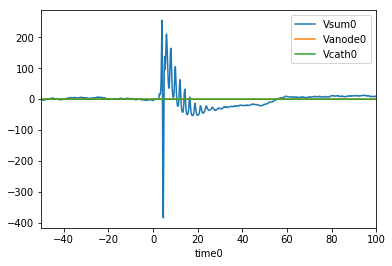

In [4]:
ax1 = DATA.plot('time0','Vsum0')
DATA.plot('time0','Vanode0',ax=ax1)
DATA.plot('time0','Vcath0',ax=ax1)
plt.xlim(-50,100)

<Figure size 1152x1152 with 0 Axes>

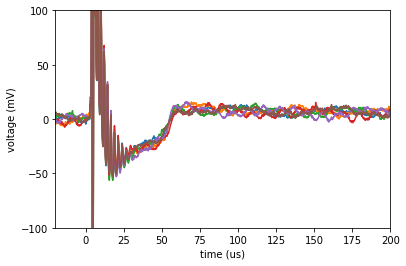

In [9]:
plt.figure(figsize=(16,16))
ax1 = DATA.plot('time0','Vsum0',legend=False)

DATA.plot('time1','Vsum1',ax=ax1,legend=False)
DATA.plot('time2','Vsum2',ax=ax1,legend=False)
DATA.plot('time3','Vsum3',ax=ax1,legend=False)
DATA.plot('time4','Vsum4',ax=ax1,legend=False)
DATA.plot('time5','Vsum5',ax=ax1,legend=False)


plt.xlim(-20,200)
plt.ylim(-100,100)
plt.xlabel('time (us)')
plt.ylabel('voltage (mV)')
plt.yticks(np.arange(-100, 110, step=50))
#plt.xticks(np.arange(-0, 41, step=2))
#plt.title('Sum (Anode + Cathode) Waveform')
plt.draw()
#plt.savefig('waveform_sums.png')


In [6]:
DATA['min'] = DATA.Vsum1[(DATA.Vsum1.shift(1) > DATA.Vsum1) & (DATA.Vsum1.shift(-1) > DATA.Vsum1)]
#df['max'] = df.data[(df.data.shift(1) < df.data) & (df.data.shift(-1) < df.data)]

(0, 30)

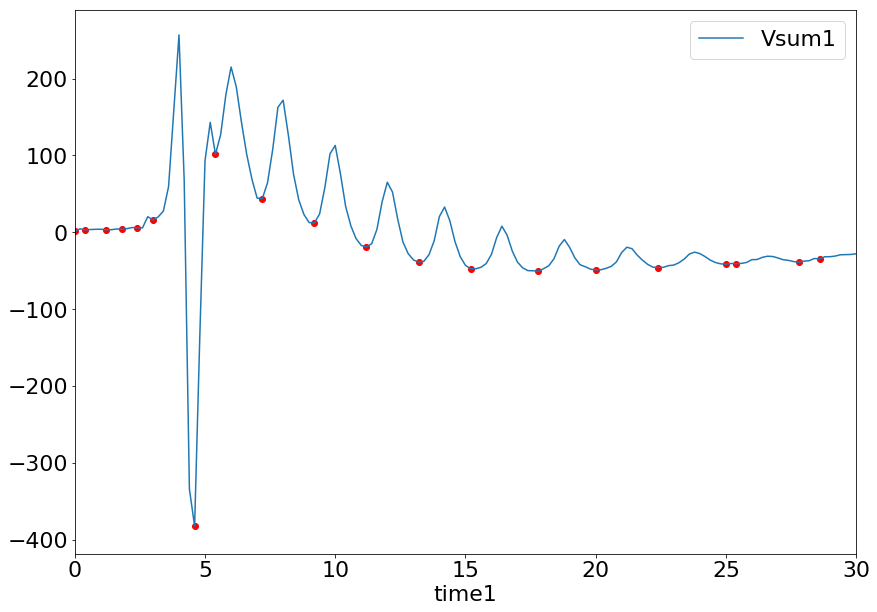

In [7]:
ax2 = DATA.plot('time1','Vsum1')
plt.scatter(DATA['time1'], DATA['min'], c='r')
plt.xlim(0,30)

In [8]:
extremes = pd.DataFrame()
extremes['mintimes'] = DATA['time1']

extremes['minima']=DATA['min']
extremes = extremes.dropna()

extremes

,mintimes,minima
2,-999.4,1.326557
4,-999.0,1.938436
6,-998.6,0.768524
8,-998.2,1.194376
11,-997.6,1.336343
13,-997.2,1.189494
18,-996.2,1.585996
22,-995.4,2.481777
25,-994.8,2.604162
29,-994.0,1.958019


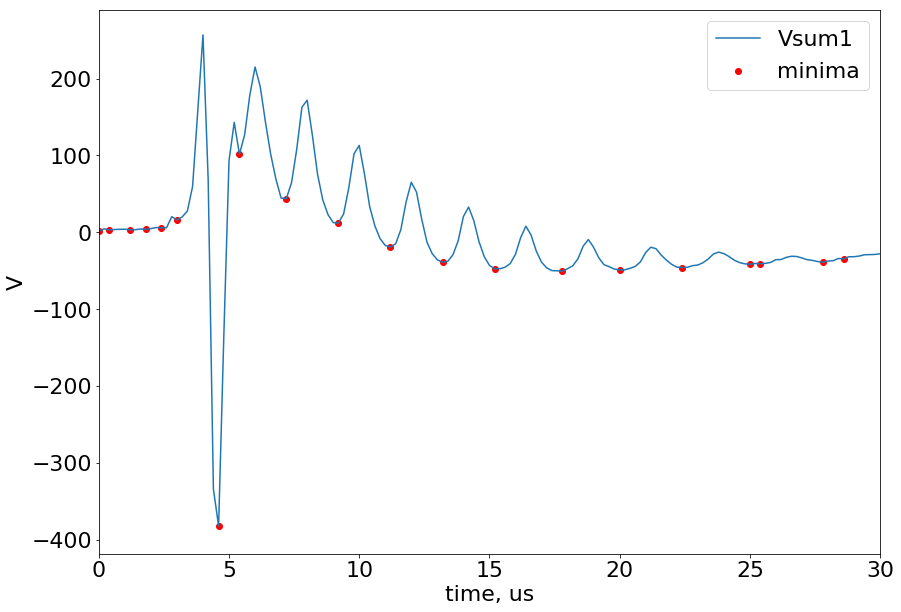

In [13]:
ax3 = DATA.plot('time1','Vsum1')
plt.scatter(extremes['mintimes'], extremes['minima'], c='r',label='minima')
plt.xlim(0,30)
plt.xlabel('time, us')
plt.ylabel('V')
plt.legend()
plt.show()

In [10]:
extremes.loc[(extremes['mintimes'] > 4) & (extremes['mintimes'] < 25)]

#THESE SHOW A WAVELENGTH OF 2 usec.

,mintimes,minima
5022,4.6,-382.430709
5026,5.4,101.479276
5035,7.2,43.820486
5045,9.2,12.071189
5055,11.2,-19.193489
5065,13.2,-39.018441
5075,15.2,-47.521155
5088,17.8,-50.551179
5099,20.0,-48.984764
5111,22.4,-45.876416
